In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
x = df.iloc[:, :8].values
y = df.iloc[:,-1].values

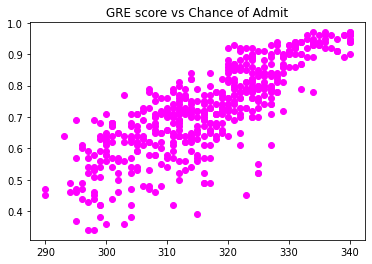

In [4]:
# creating plots to check the relation ships
plt.scatter(x[:,1],y,c='magenta')
plt.title('GRE score vs Chance of Admit')
plt.show()

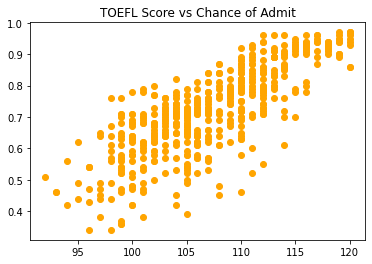

In [5]:
# creating plots to check the relation ships
plt.scatter(x[:,2],y,c='orange')
plt.title('TOEFL Score vs Chance of Admit')
plt.show()

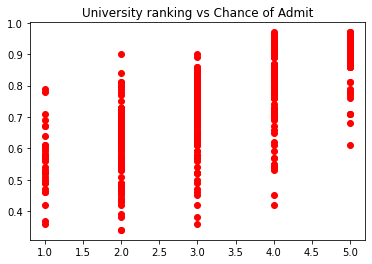

In [6]:
# creating plots to check the relation ships
plt.scatter(x[:,3],y,c='red')
plt.title('University ranking vs Chance of Admit')
plt.show()

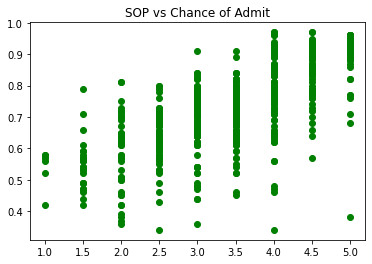

In [7]:
# creating plots to check the relation ships
plt.scatter(x[:,4],y,c='green')
plt.title('SOP vs Chance of Admit')
plt.show()

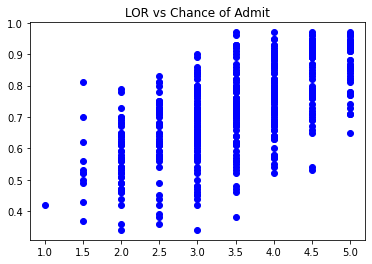

In [8]:
# creating plots to check the relation ships
plt.scatter(x[:,5],y,c='blue')
plt.title('LOR vs Chance of Admit')
plt.show()

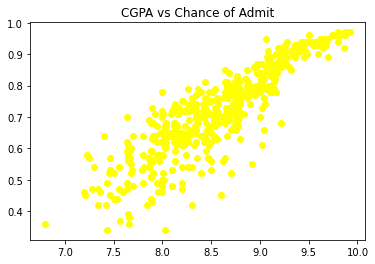

In [9]:
# creating plots to check the relation ships
plt.scatter(x[:,6],y,c='yellow')
plt.title('CGPA vs Chance of Admit')
plt.show()

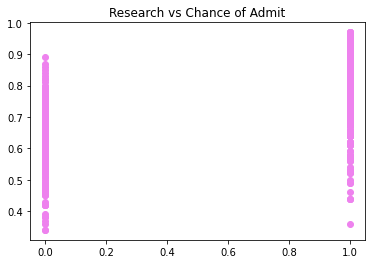

In [10]:
# creating plots to check the relation ships
plt.scatter(x[:,7],y,c='violet')
plt.title('Research vs Chance of Admit')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)

## Scaling Data

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-1.72859016  1.81923762  1.77886545 ...  1.09894429  1.77680627
   0.88640526]
 [-1.72166195  0.66714832 -0.03160087 ...  1.09894429  0.48585943
   0.88640526]
 [-1.71473373 -0.0418297  -0.52536441 ...  0.01730621 -0.95404281
   0.88640526]
 ...
 [ 1.71473373  1.19888185  2.10804114 ...  1.63976333  1.62785086
   0.88640526]
 [ 1.72166195 -0.39631872 -0.68995225 ...  1.63976333 -0.24236699
  -1.12815215]
 [ 1.72859016  0.93301508  0.95592621 ...  1.09894429  0.76721964
  -1.12815215]]


#  Multiple Linear Regression

In [13]:
import statsmodels.api as sm
x = sm.add_constant(x)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     298.4
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          4.16e-183
Time:                        16:56:16   Log-Likelihood:                 712.12
No. Observations:                 500   AIC:                            -1406.
Df Residuals:                     491   BIC:                            -1368.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.003    274.599      0.000       0.717       0.727
x1             0.0125      0.003      4.641      0.000       0.007       0.018
x2             0.0217      0.006      3.903      0.000       0.011       0.033
x3             0.0194      0.005      3.715      0.000       0.009       0.030
x4             0.0061      0.004      1.426      0.154      -0.002       0.014
x5             0.0045      0.004      1.011      0.312      -0.004       0.013
x6             0.0138      0.004      3.660      0.000       0.006       0.021
x7             0.0698      0.006     12.128      0.000       0.059       0.081
x8             0.0112      0.003      3.474      0.001       0.005       0.018
==============================================================================
Omnibus:                       83.052   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.947
Skew:                          -0.942   Prob(JB):                     3.06e-35
Kurtosis:                       5.020   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression
### To plot graphs

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(x_tr, y_tr)

y_pred = linreg.predict(x_te)

mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_te, y_pred)

print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Mean Squared Error :  0.003923718305661348
Root Mean Squared Error :  0.06263959056109282
R-Squared Error: 0.7753349858623028


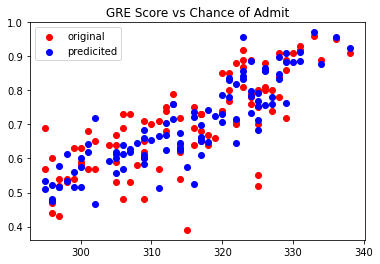

In [15]:
plt.scatter(x_te[:,1],y_te,c='red',label='original')
plt.scatter(x_te[:,1],y_pred,c='blue',label='predicited')
plt.title('GRE Score vs Chance of Admit')
plt.legend()
plt.show()

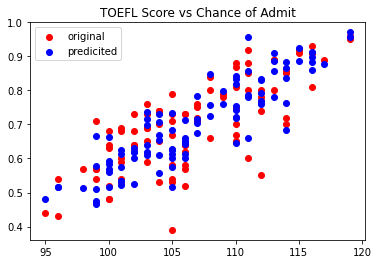

In [16]:
plt.scatter(x_te[:,2],y_te,c='red',label='original')
plt.scatter(x_te[:,2],y_pred,c='blue',label='predicited')
plt.title('TOEFL Score vs Chance of Admit')
plt.legend()
plt.show()

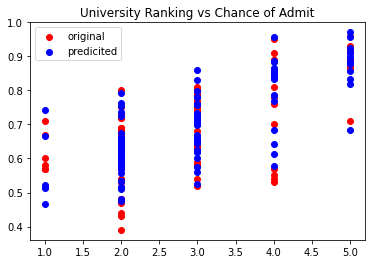

In [17]:
plt.scatter(x_te[:,3],y_te,c='red',label='original')
plt.scatter(x_te[:,3],y_pred,c='blue',label='predicited')
plt.title('University Ranking vs Chance of Admit')
plt.legend()
plt.show()

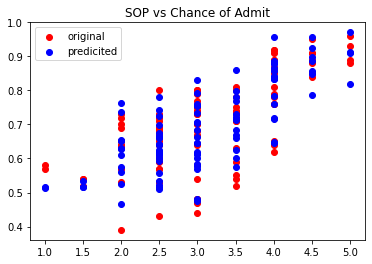

In [18]:
plt.scatter(x_te[:,4],y_te,c='red',label='original')
plt.scatter(x_te[:,4],y_pred,c='blue',label='predicited')
plt.title('SOP vs Chance of Admit')
plt.legend()
plt.show()

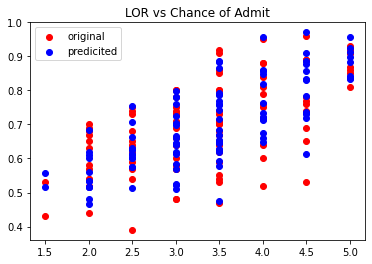

In [19]:
plt.scatter(x_te[:,5],y_te,c='red',label='original')
plt.scatter(x_te[:,5],y_pred,c='blue',label='predicited')
plt.title('LOR vs Chance of Admit')
plt.legend()
plt.show()

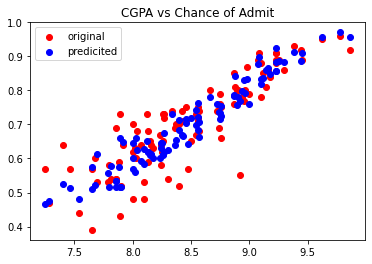

In [20]:
plt.scatter(x_te[:,6],y_te,c='red',label='original')
plt.scatter(x_te[:,6],y_pred,c='blue',label='predicited')
plt.title('CGPA vs Chance of Admit')
plt.legend()
plt.show()

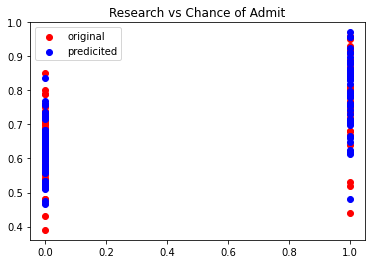

In [21]:
plt.scatter(x_te[:,7],y_te,c='red',label='original')
plt.scatter(x_te[:,7],y_pred,c='blue',label='predicited')
plt.title('Research vs Chance of Admit')
plt.legend()
plt.show()

# Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rfr = RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(x_tr, y_tr)

rfr_pred = rfr.predict(x_te)

mse = mean_squared_error(y_te, rfr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_te, rfr_pred)

print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Mean Squared Error :  0.003206939999999998
Root Mean Squared Error :  0.05662985078560598
R-Squared Error: 0.8163764153509212
